In [1]:
# prediction using multivariate regression

## Notebook Imports

In [198]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd

import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
# so that chart woild show up when we export our notebook


## Gather data

[Source: Original Paper](https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air)

In [3]:
boston_dataset = load_boston()

In [4]:
type(boston_dataset)

sklearn.utils.Bunch

In [5]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [6]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
type(boston_dataset.data)

numpy.ndarray

In [8]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [9]:
boston_dataset.data.shape # chaining dot notation

(506, 13)

In [10]:
# Actual Prices in thousands(000s)
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Clean and Explore the data using pandas DataFrame

In [11]:
# Create a pandas dataframe
data = pd.DataFrame(data = boston_dataset.data, columns=boston_dataset.feature_names)

In [12]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
# adding target to dataframe

data['PRICE'] = boston_dataset.target

data.head()

In [14]:
data.count() # shows the number of rows

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

### Cleaning data - check for missing values

In [15]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [16]:
# alternative way of checking
data.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### Visualization

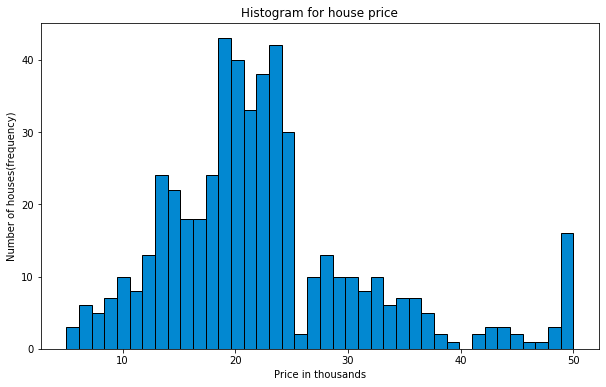

In [18]:
plt.figure(figsize=(10,6))
plt.hist(data['PRICE'], bins=40, ec='black',color='#0288D1') # bins for granularity
plt.xlabel('Price in thousands')
plt.ylabel('Number of houses(frequency)')
plt.title('Histogram for house price')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


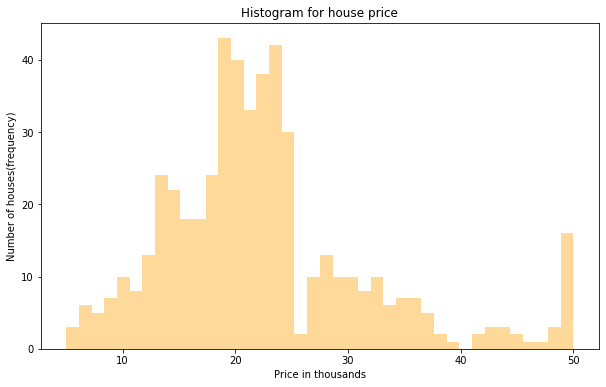

In [19]:
plt.figure(figsize=(10,6))
sns.distplot(data['PRICE'], kde=False, bins=40, color='#FFA000')
plt.xlabel('Price in thousands')
plt.ylabel('Number of houses(frequency)')
plt.title('Histogram for house price')
plt.show()
plt.show()

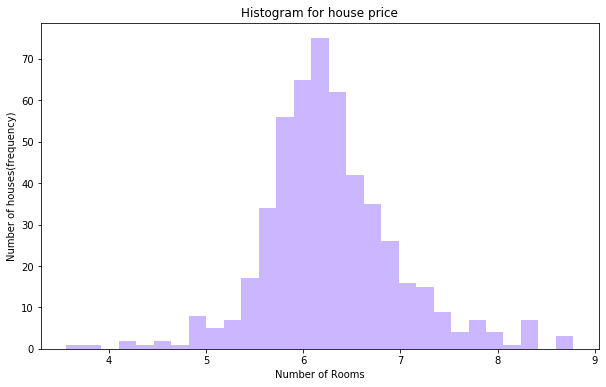

In [20]:
# visualizing number of rooms

plt.figure(figsize=(10,6))
sns.distplot(data['RM'], kde=False,color='#7C4DFF')
plt.xlabel('Number of Rooms')
plt.ylabel('Number of houses(frequency)')
plt.title('Histogram for house price')
plt.show()
plt.show()

In [21]:
# average no. of rooms per dwellings on entire dataset
np.average(data['RM'])

6.284634387351779

In [22]:
data['RM'].mean() # calling mean method on series object

6.284634387351787

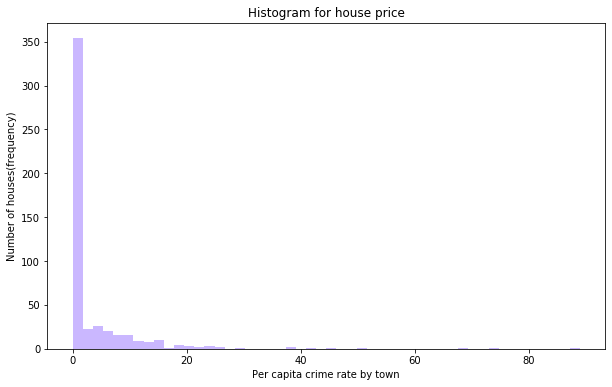

In [23]:
# visualizing per capita crime rate by town

plt.figure(figsize=(10,6))
sns.distplot(data['CRIM'], kde=False, color='#7C4DFF')
plt.xlabel('Per capita crime rate by town')
plt.ylabel('Number of houses(frequency)')
plt.title('Histogram for house price')
plt.show()
plt.show()

In [24]:
# plotting RAD feature using histogram

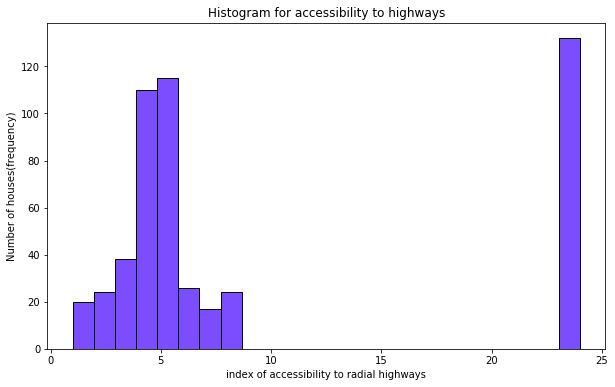

In [25]:
plt.figure(figsize=(10,6))

plt.hist(data['RAD'],bins=24, ec='black',  color='#7C4DFF')
plt.xlabel('index of accessibility to radial highways')
plt.ylabel('Number of houses(frequency)')
plt.title('Histogram for accessibility to highways')
plt.show()

In [26]:
data['RAD'].unique()

array([ 1.,  2.,  3.,  5.,  4.,  8.,  6.,  7., 24.])

In [27]:
data['RAD'].value_counts()

# 1 is the value for low accesibility
# 24 is the value for high accessibility

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [28]:
frequency = data['RAD'].value_counts()

In [29]:
# retrieve axes from the series object

# frequency.index

frequency.axes[0]

Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 8.0, 2.0, 1.0, 7.0], dtype='float64')

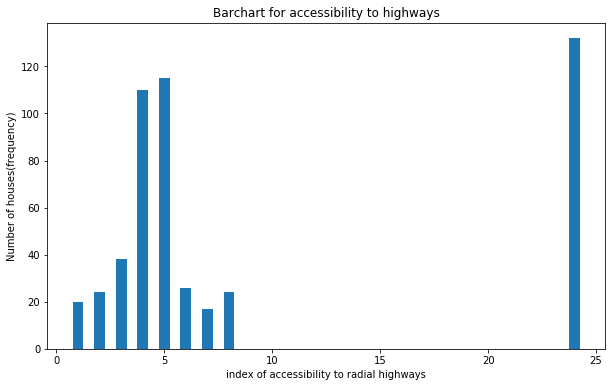

In [30]:

plt.figure(figsize=(10,6))

plt.bar(frequency.index, frequency.values, width=0.5)
plt.xlabel('index of accessibility to radial highways')
plt.ylabel('Number of houses(frequency)')
plt.title('Barchart for accessibility to highways')


plt.show()

In [31]:
# how many property is next to the Charles river
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

#### Descriptive Statistics

In [32]:
# dealing about minimum, maximum, mean and median value

In [33]:
print('the minimum price of house in our dataset is',data['PRICE'].min())

the minimum price of house in our dataset is 5.0


In [34]:
print(' {} is the maximum price of house in our datset'.format(data['PRICE'].max()))

 50.0 is the maximum price of house in our datset


In [35]:
mean = data['PRICE'].mean()
print(f'{mean} is the mean price of house')

22.532806324110698 is the mean price of house


In [36]:
print('the median price of house is', data['PRICE'].median())

the median price of house is 21.2


In [37]:
# to see minimum value in every single value
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [38]:
# to see all the stats at the same time

data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Correlation

#### $$ \rho_{XY} = corr(X,Y) $$
#### $$ -1.0 \leq \rho_{XY} \leq +1.0 $$

In [39]:
# correlation between average no. of rooms and the house price

data['RM'].corr(data['PRICE'])

0.695359947071539

In [40]:
data['PTRATIO'].corr(data['PRICE'])

#PTRATIO measures school quality

-0.5077866855375615

In [41]:
# to see the entire correlation between the features

corr_mat = data.corr() # pearson is valid only for continuous variable and not for dummy variable 

# RAD is a discrete variable thus correlation calculation does not hold

# correlaiton does not imply causation
# holds for linear relationship only

In [42]:
new_mask = np.zeros_like(data.corr())
traingle_indices = np.triu_indices_from(new_mask)
new_mask[traingle_indices]= True
new_mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 <a list of 14 Text yticklabel objects>)

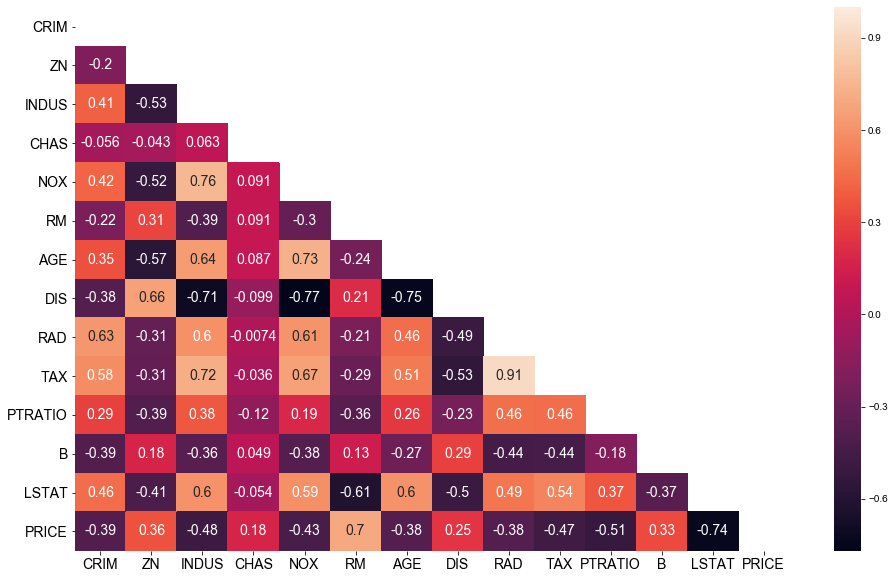

In [43]:
# making a heatmap for correlation 

plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True, mask=new_mask, annot_kws={'size':14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [44]:
# test for multicollinearity
# check if dis feature add explanatory power to your model
# identifies strong correlation

In [45]:
# relationship between pollution and distance from the employment center

In [46]:
data['NOX'].corr(data['DIS'])

-0.7692301132258278

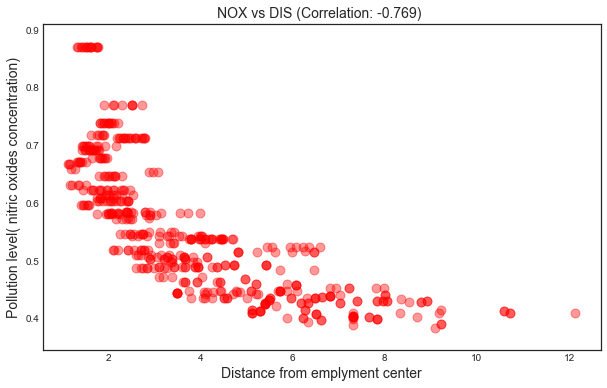

In [71]:
plt.figure(figsize=(10,6))
corr = np.around(data['NOX'].corr(data['DIS']),3)
plt.scatter(data['DIS'], data['NOX'], s=80, c='red', alpha=0.4)
plt.xlabel('Distance from emplyment center',fontsize=14)
plt.ylabel('Pollution level( nitric oxides concentration)',fontsize=14)
plt.title('NOX vs DIS (Correlation: {}) '.format(corr),fontsize=14)
plt.show()

In [102]:
# making it with seaborn

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


<Figure size 720x432 with 0 Axes>

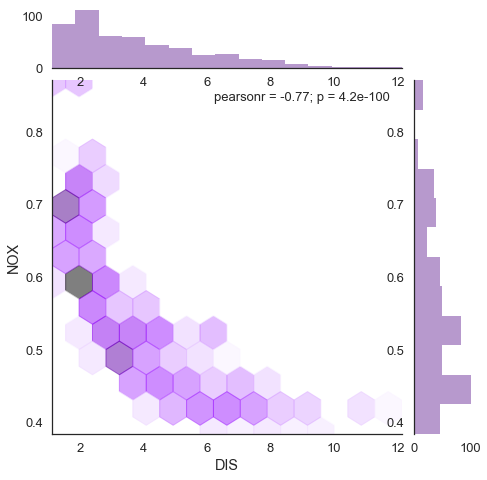

In [101]:
sns.set()
sns.set_context('talk')
sns.set_style('white')
plt.figure(figsize=(10,6))
sns.jointplot(data['DIS'], data['NOX'], kind='hex', size=7,color='indigo', joint_kws={'alpha':0.5} )

plt.show()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


<Figure size 720x432 with 0 Axes>

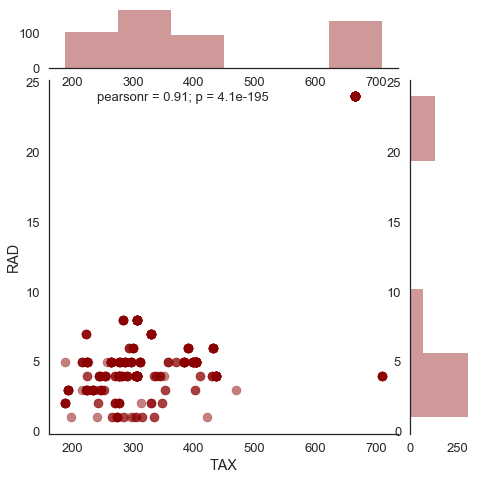

In [104]:
sns.set()
sns.set_context('talk')
sns.set_style('white')
plt.figure(figsize=(10,6))
sns.jointplot(data['TAX'], data['RAD'], size=7,color='darkred', joint_kws={'alpha':0.5} )

plt.show()

In [105]:
# misleanding result because pearson correlation does not work for non-continuous data, RAD in this case.
# also there is presence of ouutliers that drive the correlation towards very high value

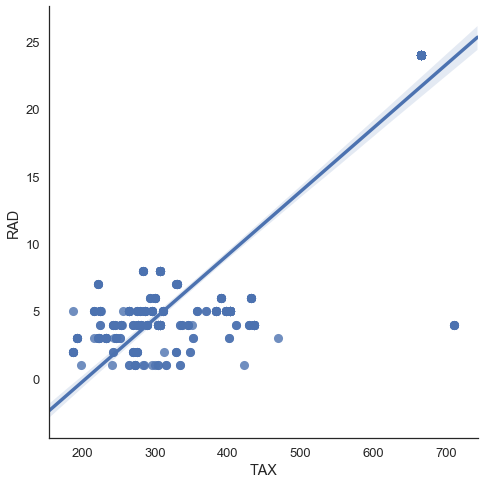

In [108]:
sns.lmplot(x='TAX', y='RAD', data = data, size=7)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


<Figure size 720x432 with 0 Axes>

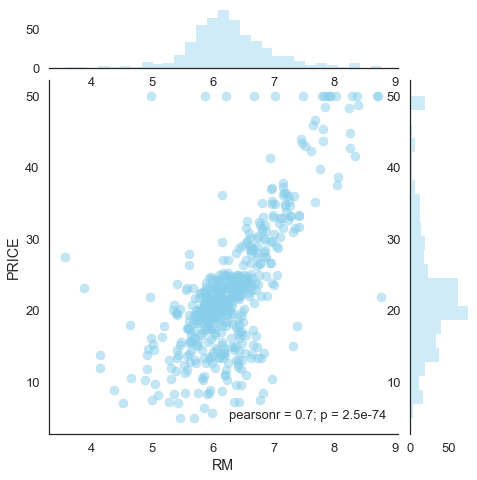

In [111]:
# SCATTER PLOT FOR Number of rooms per dwelling vs Price of house

sns.set()
sns.set_context('talk')
sns.set_style('white')
plt.figure(figsize=(10,6))
sns.jointplot(data['RM'], data['PRICE'], size=7,color='skyblue', joint_kws={'alpha':0.5} )

plt.show()

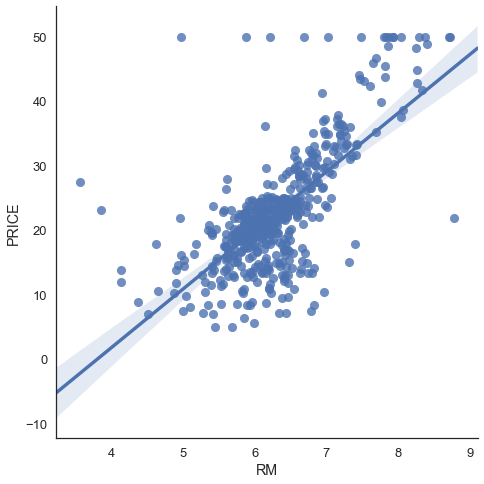

CPU times: user 896 ms, sys: 23.3 ms, total: 919 ms
Wall time: 623 ms


In [116]:
%%time

sns.lmplot(x='RM', y='PRICE', data=data, size=7)
plt.show()

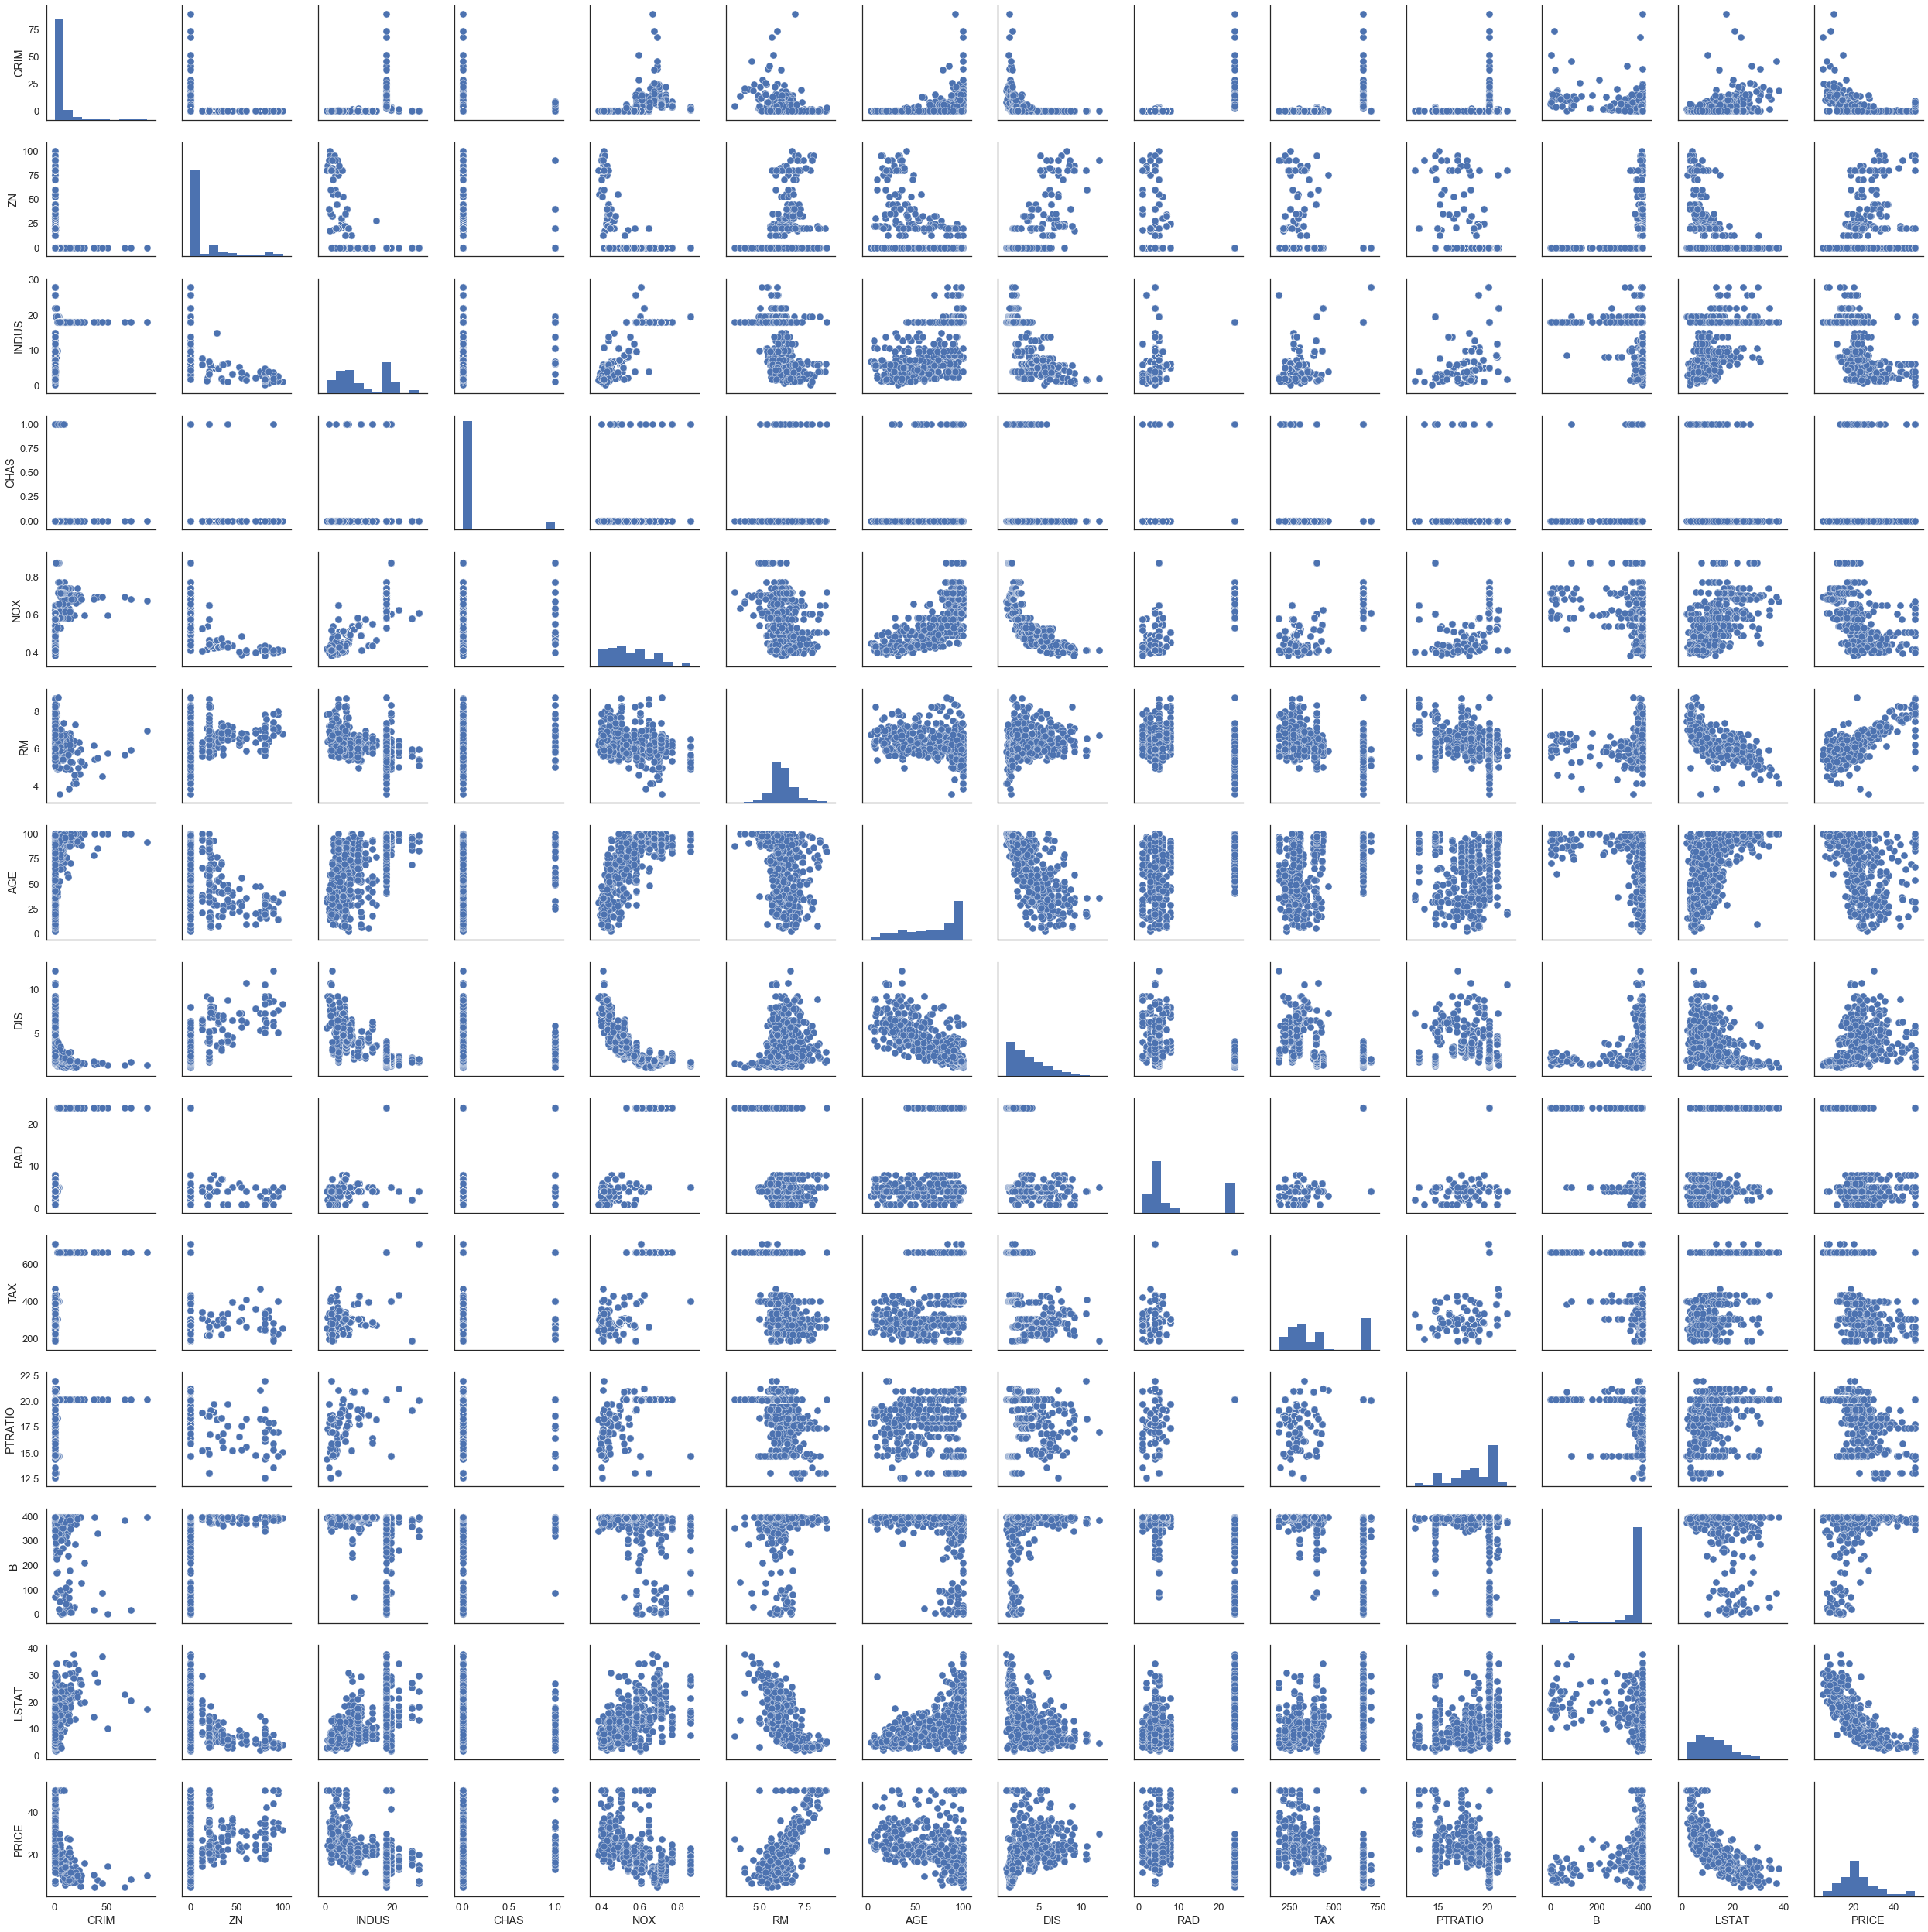

CPU times: user 1min 2s, sys: 1.04 s, total: 1min 3s
Wall time: 1min 5s


In [117]:
%%time

#sns.pairplot(data)
plt.show()

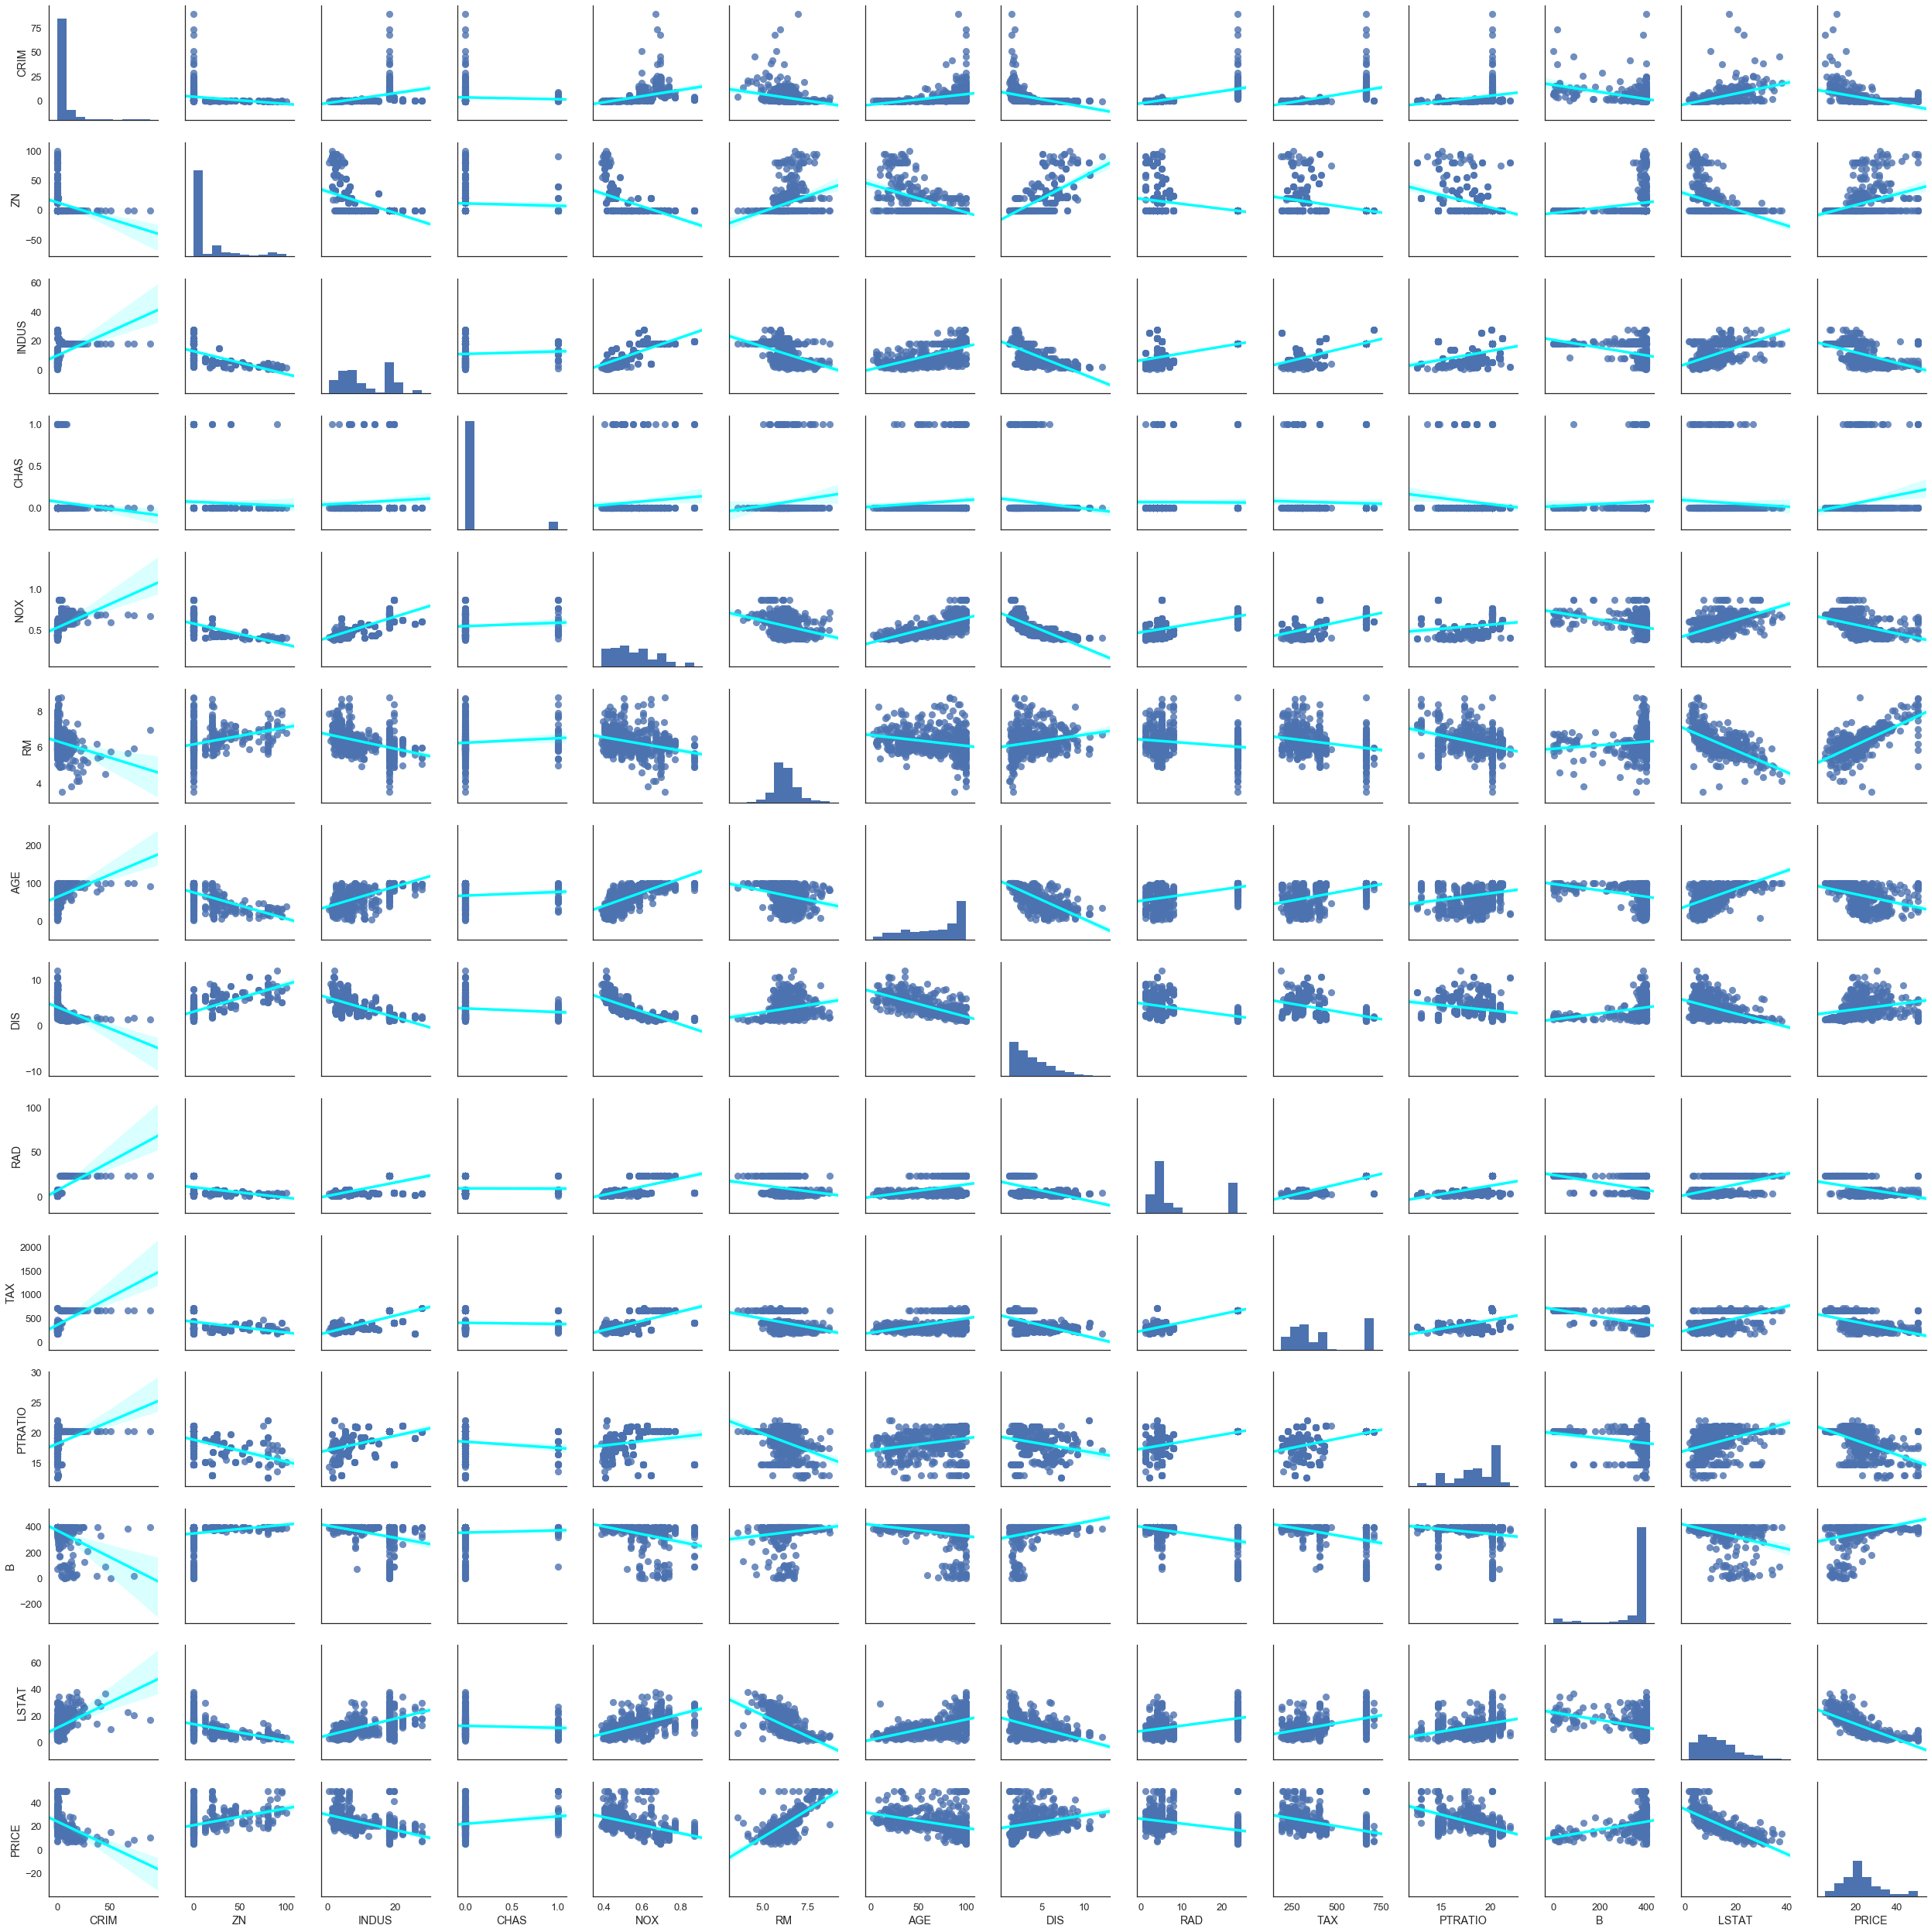

CPU times: user 2min 32s, sys: 2.91 s, total: 2min 35s
Wall time: 1min 54s


In [118]:
%%time 

#sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'cyan'}} )
plt.show()

### Training and test dataset split

In [181]:
prices = data['PRICE']
features = data.drop('PRICE', axis=1)

X_train,X_test, y_train,y_test = train_test_split(features,prices, test_size=0.2, random_state=10)

# % traininig_data

len(X_train)/len(features)


0.7984189723320159

In [126]:
# % of test data

X_test.shape[0]/features.shape[0]

0.2015810276679842

## Multi variable Regression

In [128]:
regr = LinearRegression()
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [162]:
print('Intercept',regr.intercept_)


## printing r-squared value for training and test dataset

print('Training data r-squared value: ', regr.score(X_train, y_train))

# we are able to explain 75% of variance in our house price with just 13 features

print('Test data r-squared value: ', regr.score(X_test, y_test))

# putting coefficients in a dataframe done for sense check

feature = data.columns.drop('PRICE')
pd.DataFrame(regr.coef_, index=feature, columns=['Correlation Coefficient'])

Intercept 36.53305138282439
Training data r-squared value:  0.750121534530608
Test data r-squared value:  0.6709339839115628


,Correlation Coefficient
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


## Model Evaluation

In [164]:
### Data Transformation

In [166]:
data['PRICE'].skew() # this shows our model is right skewed, mean>median

1.1080984082549072

In [171]:
# so we will log_transform the data with outlier to make it more 
y_log = np.log(data['PRICE'])
y_log.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: PRICE, dtype: float64

In [172]:
y_log.skew()

-0.33032129530987864

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


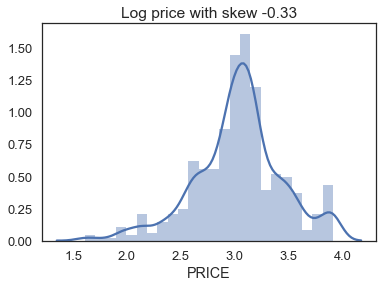

In [175]:
# transformation for target data using log

sns.distplot(y_log)
plt.title(f'Log price with skew {np.around(y_log.skew(),3)}')
plt.show()

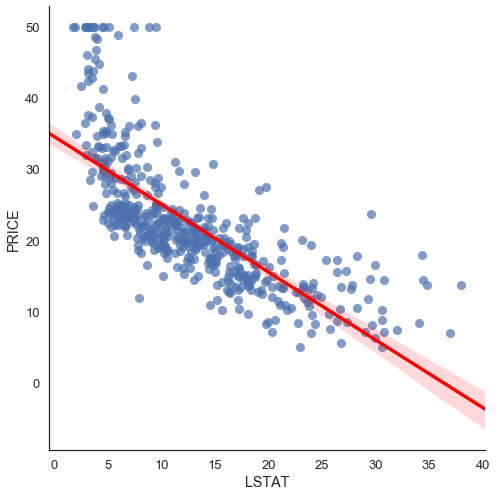

In [177]:
sns.lmplot(x='LSTAT', y='PRICE', size=7,data=data, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
plt.show()

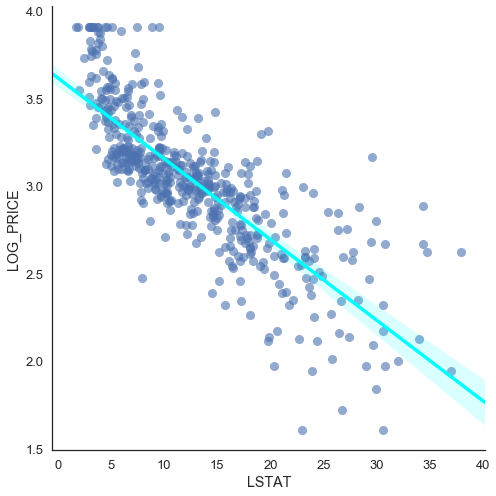

In [186]:
transformed_data = features
transformed_data['LOG_PRICE']= y_log
sns.lmplot(x='LSTAT', y='LOG_PRICE', size=7,data=transformed_data, scatter_kws={'alpha':0.6}, line_kws={'color':'cyan'})
plt.show()

In [205]:
## using a diffrent log_model instead of original model for price (after log_transforming the price target variable)

## reduced skew of target allowed to improve the model performance
## higher r-square and better fit
prices = np.log(data['PRICE']) # use log prices
features = data.drop('PRICE', axis=1)

X_train,X_test, y_train,y_test = train_test_split(features,prices, test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train,y_train)

print('Intercept',regr.intercept_)


## printing r-squared value for training and test dataset

print('Training data r-squared value: ', regr.score(X_train, y_train))

# we are able to explain 75% of variance in our house price with just 13 features

print('Test data r-squared value: ', regr.score(X_test, y_test))

# putting coefficients in a dataframe done for sense check

feature = data.columns.drop('PRICE')
pd.DataFrame(regr.coef_, index=feature, columns=['Correlation Coefficient'])


Intercept 4.05994387177519
Training data r-squared value:  0.7930234826697583
Test data r-squared value:  0.7446922306260724


,Correlation Coefficient
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


### P-value and evaluating coefficients

In [206]:
# we should also check if the obtained coefficeints value are statistically significant
# we do so using p-value
# if p < alpha(0.05 say) we say the value is statistically significant, and reject the null hypothesis

In [258]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)

results = model.fit()
# results.params
# results.pvalues

pd.DataFrame({'coefficient':results.params,'p-values':round(results.pvalues,3)})

,coefficient,p-values
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


### Testing for Multicollinearity( VIF )

$$ TAX = \alpha_0 + \alpha_1 RM + \alpha_2 NOX + ... + \alpha_{12} LSTAT$$
$$ VIF_{TAX} = \frac {1}{1-(R_{VIF}^2)}$$

In [259]:
# to calculate VIF for CRIM feature 

variance_inflation_factor(exog=X_incl_const.values, exog_idx=1)

1.7145250443932485

In [260]:
# print number of columns in X_incl_const dataframe

len(X_incl_const.columns)

# X_incl_const.shape[1]

14

In [261]:
vif=[] # empty list
for i in range(len(X_incl_const.columns)):
    print(f'vif{i}: ',variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))
    if i!=0:
        vif.append(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))

vif





vif0:  597.5487126763895
vif1:  1.7145250443932485
vif2:  2.3328224265597584
vif3:  3.943448822674636
vif4:  1.0788133385000576
vif5:  4.410320817897634
vif6:  1.8404053075678568
vif7:  3.3267660823099408
vif8:  4.222923410477865
vif9:  7.314299817005058
vif10:  8.508856493040817
vif11:  1.839911632651406
vif12:  1.3386713255364715
vif13:  2.812544292793034


[1.7145250443932485,
 2.3328224265597584,
 3.943448822674636,
 1.0788133385000576,
 4.410320817897634,
 1.8404053075678568,
 3.3267660823099408,
 4.222923410477865,
 7.314299817005058,
 8.508856493040817,
 1.839911632651406,
 1.3386713255364715,
 2.812544292793034]

In [262]:
# using list comprehension
vif=[variance_inflation_factor(exog=X_incl_const.values, exog_idx=i) for i in range(len(X_incl_const.columns)) ]
vif

[597.5487126763895,
 1.7145250443932485,
 2.3328224265597584,
 3.943448822674636,
 1.0788133385000576,
 4.410320817897634,
 1.8404053075678568,
 3.3267660823099408,
 4.222923410477865,
 7.314299817005058,
 8.508856493040817,
 1.839911632651406,
 1.3386713255364715,
 2.812544292793034]

In [263]:
pd.DataFrame({'coef_name':X_incl_const.columns, 
              'vif_values': np.around(vif,2)})

# generally any VIF>10 would be considered problematic (multicollinearity )

,coef_name,vif_values
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


### Model simplification and the BIC

In [264]:
# Origianl model with all features and log_prices

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)

results = model.fit()
org_coef = pd.DataFrame({'coefficient':results.params,'p-values':round(results.pvalues,3)})

print('BIC is: ',results.bic)
print('r squared is: ',results.rsquared )



BIC is:  -139.74997769478875
r squared is:  0.7930234826697582


In [266]:
# Reduced model#1 without INDUS features and log_prices

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const.drop('INDUS', axis=1))

results = model.fit()
coef_minus_indus = pd.DataFrame({'coefficient':results.params,'p-values':round(results.pvalues,3)})

print('BIC is: ',results.bic)
print('r squared is: ',results.rsquared )



BIC is:  -145.14508855591163
r squared is:  0.7927126289415163


In [267]:
# Lower number for BIC shows improvement in the new model without the INDUS feature

In [270]:
# Reduced model#2 without INDUS and AGE features and log_prices

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const.drop(['INDUS','AGE'], axis=1))

results = model.fit()
reduced_coef = pd.DataFrame({'coefficient':results.params,'p-values':round(results.pvalues,3)})

print('BIC is: ',results.bic)
print('r squared is: ',results.rsquared )



BIC is:  -149.49934294224656
r squared is:  0.7918657661852815


In [269]:
# we checked for age and indus feature because they have pretty high p-value

In [271]:
# comparing if the coefficients of all 3 models are stable (also they don't change the sign)
frames = [org_coef, coef_minus_indus, reduced_coef]
pd.concat(frames, axis=1)

,coefficient,p-values,coefficient,p-values,coefficient,p-values
const,4.059944,0.000,4.056231,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001551,0.010,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
RM,0.073404,0.000,0.071739,0.000,0.076133,0.000
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


### Residuals and Residual Plot

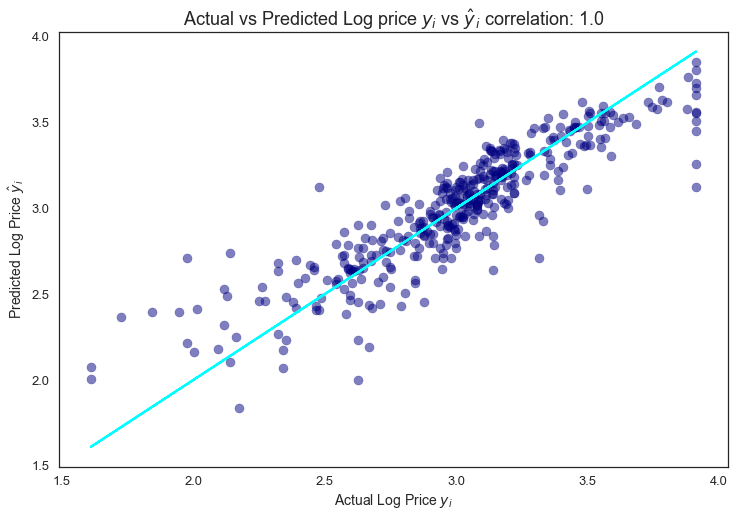

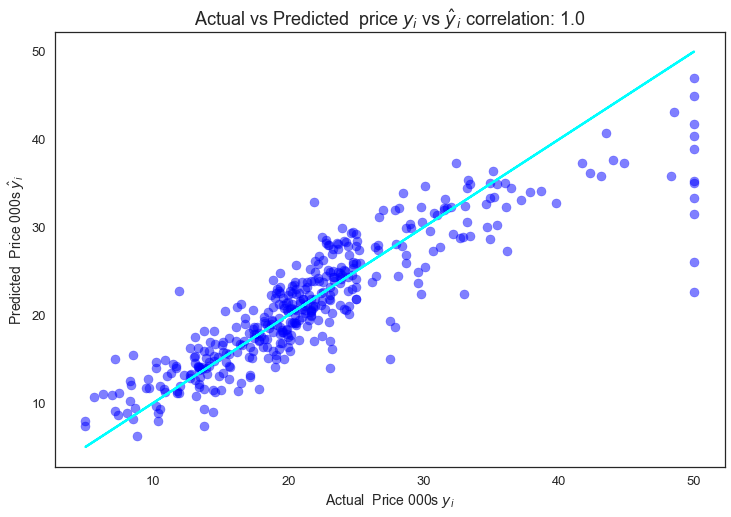

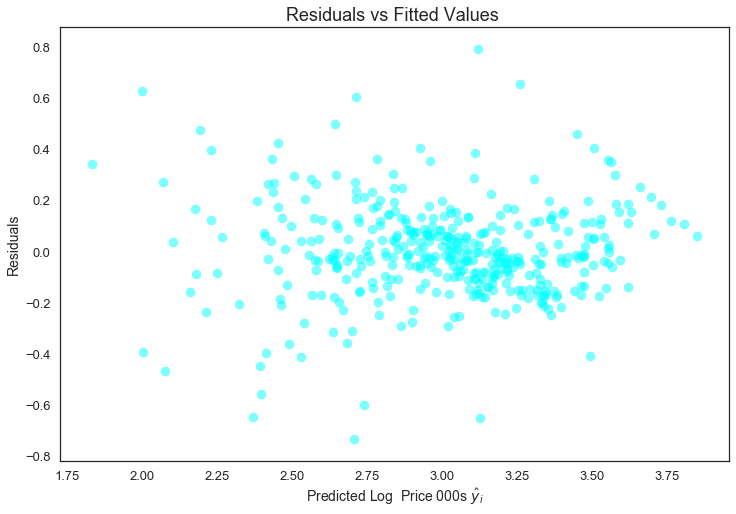

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


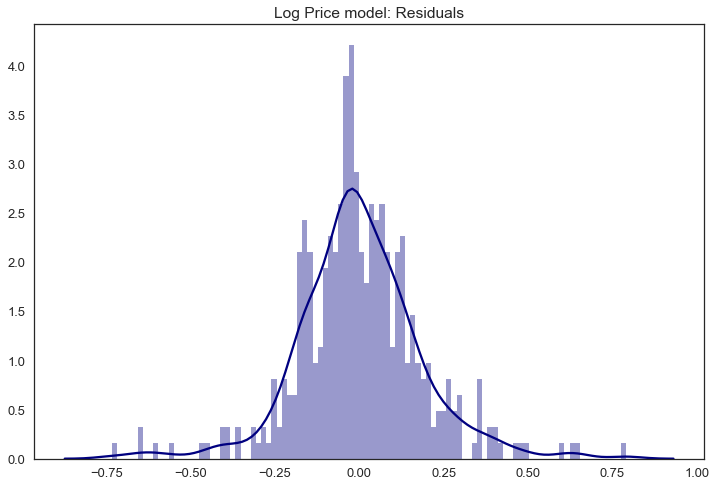

mean of residauls is:  -0.0
skew of residauls is:  0.118


In [337]:
# Modified model : Transformed using log_transformationa and simplified by dropping two features 

prices = np.log(data['PRICE']) # use log prices
features = data.drop(['PRICE','AGE','INDUS'], axis=1)

X_train,X_test, y_train,y_test = train_test_split(features,prices, test_size=0.2, random_state=10)

# Using statsmodels

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)

results = model.fit()

# residuals

# residuals = y_train - results.fittedvalues
# results.resid

# Graph of actual vs. predicted prices

corr = round(y_train.corr(results.fittedvalues))
plt.figure(figsize=(12,8))

plt.scatter(x=y_train, y = results.fittedvalues, color='navy', alpha=0.5)
plt.plot(y_train, y_train, color='cyan')
plt.xlabel('Actual Log Price $ y_i$', fontsize=14)
plt.ylabel('Predicted Log Price $\hat y_i $', fontsize=14)
plt.title(f'Actual vs Predicted Log price $y _i$ vs $\hat y_i$ correlation: {corr}', fontsize=18)


plt.show()

plt.figure(figsize=(12,8))
plt.scatter(x=np.e**y_train, y = np.e**results.fittedvalues, color='blue', alpha=0.5)
plt.plot(np.e**y_train, np.e**y_train, color='cyan')
plt.xlabel('Actual  Price 000s $ y_i$', fontsize=14)
plt.ylabel('Predicted  Price 000s $\hat y_i $', fontsize=14)
plt.title(f'Actual vs Predicted  price $y _i$ vs $\hat y_i$ correlation: {corr}', fontsize=18)

plt.show()

# Residuals vs predicted values

plt.figure(figsize=(12,8))
plt.scatter(x=results.fittedvalues, y = results.resid, color='cyan', alpha=0.5)
plt.xlabel('Predicted Log  Price 000s $\hat  y_i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title(f'Residuals vs Fitted Values ', fontsize=18)

plt.show()

# Distribution of residuals

plt.figure(figsize=(12,8))
sns.distplot(results.resid, bins=100, color='navy')
plt.title('Log Price model: Residuals')
plt.show()

resid_mean = round(np.mean(results.resid),3)
resid_skew =  round(results.resid.skew(),3)

print('mean of residauls is: ', round(np.mean(results.resid),3))
print('skew of residauls is: ', round(results.resid.skew(),3))

# Mean Squared Error and R-Squared

reduced_log_mse = round(results.mse_resid,3)
reduced_log_rsq = round(results.rsquared, 3)

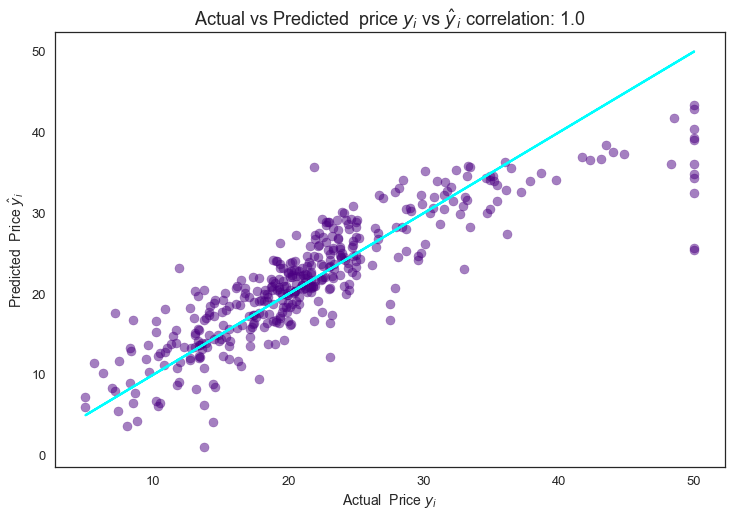

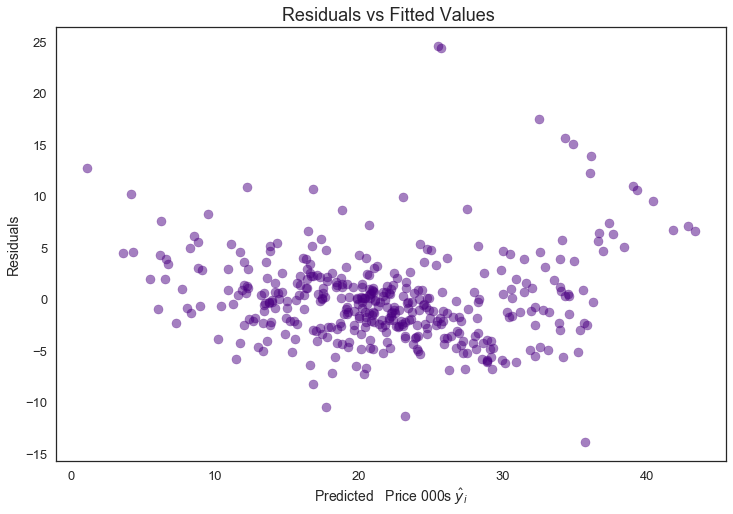

/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


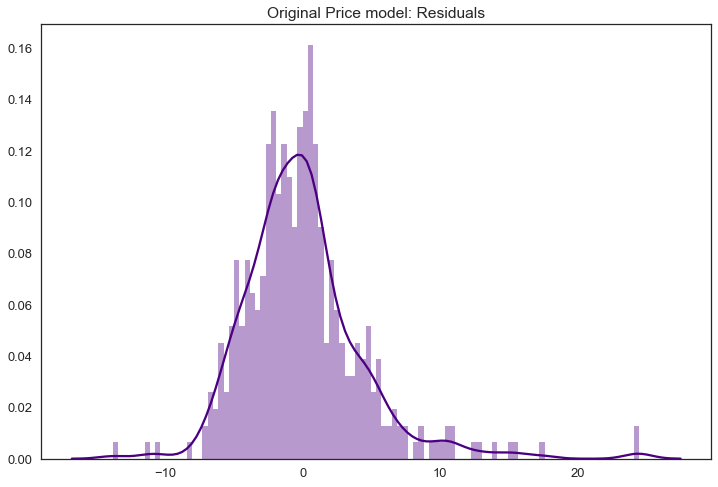

mean of residauls is:  0.0
skew of residauls is:  1.459


In [333]:
# Visualizing original model

prices = data['PRICE'] # use normal prices and all features
features = data.drop('PRICE', axis=1)

X_train,X_test, y_train,y_test = train_test_split(features,prices, test_size=0.2, random_state=10)

# Using statsmodels

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)

results = model.fit()


plt.figure(figsize=(12,8))

plt.scatter(x=y_train, y = results.fittedvalues, color='indigo', alpha=0.5)
plt.plot(y_train, y_train, color='cyan')
plt.xlabel('Actual  Price $ y_i$', fontsize=14)
plt.ylabel('Predicted  Price $\hat y_i $', fontsize=14)
plt.title(f'Actual vs Predicted  price $y _i$ vs $\hat y_i$ correlation: {corr}', fontsize=18)


plt.show()

# Residuals vs predicted values

plt.figure(figsize=(12,8))
plt.scatter(x=results.fittedvalues, y = results.resid, color='indigo', alpha=0.5)
plt.xlabel('Predicted   Price 000s $\hat  y_i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title(f'Residuals vs Fitted Values ', fontsize=18)

plt.show()

# Distribution of residuals

plt.figure(figsize=(12,8))
sns.distplot(results.resid, bins=100, color='indigo')
plt.title('Original Price model: Residuals')
plt.show()

resid_mean = round(np.mean(results.resid),3)
resid_skew =  round(results.resid.skew(),3)

print('mean of residauls is: ', round(np.mean(results.resid),3))
print('skew of residauls is: ', round(results.resid.skew(),3))

# Mean Squared Error and R-Squared
full_normal_mse = round(results.mse_resid,3)
full_normal_rsq = round(results.rsquared, 3)

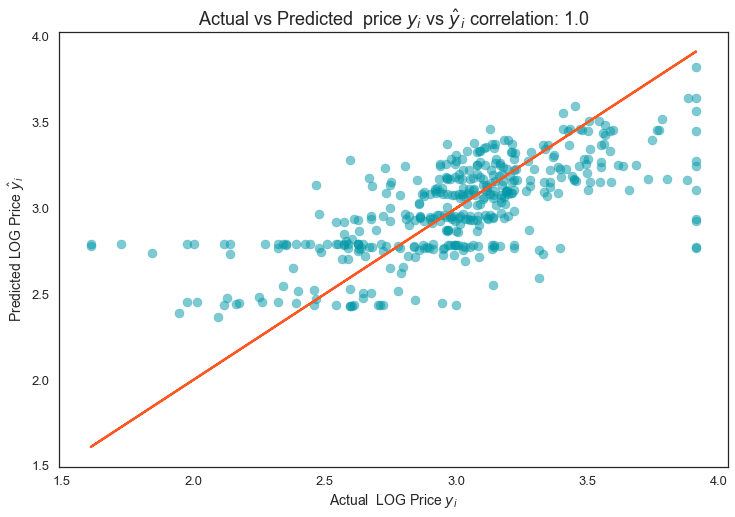

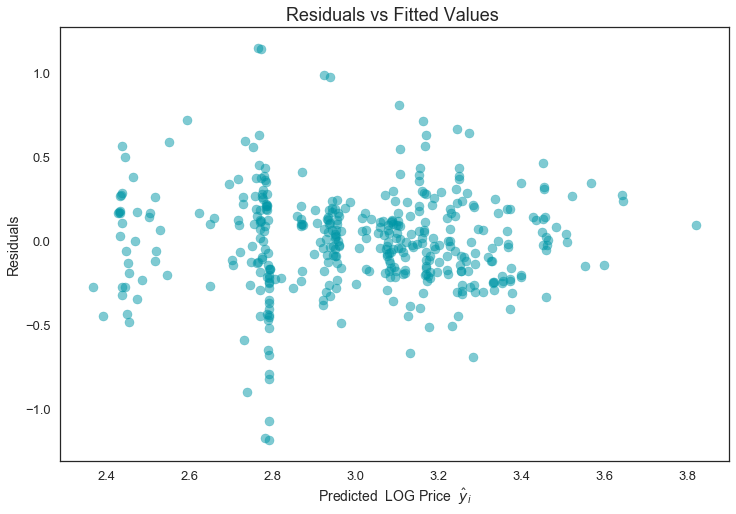

In [334]:
# Visualizing model Omitting key Features and using log prices

prices = np.log(data['PRICE']) # use normal prices and all features
features = data.drop(['PRICE','INDUS','RM','LSTAT','AGE','CRIM','NOX'], axis=1)

X_train,X_test, y_train,y_test = train_test_split(features,prices, test_size=0.2, random_state=10)

# Using statsmodels

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)

results = model.fit()


plt.figure(figsize=(12,8))

plt.scatter(x=y_train, y = results.fittedvalues, color='#0097A7', alpha=0.5)
plt.plot(y_train, y_train, color='#FF5722')
plt.xlabel('Actual  LOG Price $ y_i$', fontsize=14)
plt.ylabel('Predicted LOG Price $\hat y_i $', fontsize=14)
plt.title(f'Actual vs Predicted  price $y _i$ vs $\hat y_i$ correlation: {corr}', fontsize=18)


plt.show()

# Residuals vs predicted values

plt.figure(figsize=(12,8))
plt.scatter(x=results.fittedvalues, y = results.resid, color='#0097A7', alpha=0.5)
plt.xlabel('Predicted  LOG Price  $\hat  y_i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title(f'Residuals vs Fitted Values ', fontsize=18)

plt.show()

# Mean Squared Error and R-Squared
omitted_log_mse = round(results.mse_resid,3)
omitted_log_rsq = round(results.rsquared, 3)



In [343]:
metric_df = pd.DataFrame({'R-squared':[reduced_log_rsq, full_normal_rsq,omitted_log_rsq],'Mean Squared Error':[reduced_log_mse,
                                                                                                  full_normal_mse, 
                                                                                                  omitted_log_mse],
             'RMSE':np.sqrt([reduced_log_mse,full_normal_mse, omitted_log_mse])},
            index=['Reduced_log_model','Full_normal_model','Ommitted model'])
metric_df

,R-squared,Mean Squared Error,RMSE
Reduced_log_model,0.792,0.035,0.187083
Full_normal_model,0.750,19.921,4.463295
Ommitted model,0.460,0.090,0.300000


In [356]:
# example estimate of $30000 at 95% prediction interval using reduced log model

interval = [np.e**(np.log(30000)-2*metric_df['RMSE']['Reduced_log_model']), np.e**(np.log(30000)+2*metric_df['RMSE']['Reduced_log_model'])]
interval



[20635.88690682414, 43613.342332399385]